# Prepare Landsea Mask 

Here, we define a land sea mask

In [1]:
%matplotlib inline

import numpy as np
import pylab as pl
import xarray as xr
import datetime

In [2]:
import nawdex_analysis.io.reproj
import nawdex_analysis.io.input_obs as iobs

from tropy.standard_config import local_data_path
from tropy.l15_msevi.msevi import MSevi

## Set SEVIRI region for Tropical Atlantic

In [3]:
SEVIRI_region = ((1250, 2150), (250, 2300))
NWCSAF_region = nawdex_analysis.io.reproj.slice2nwcsaf_region( SEVIRI_region )

## Set Date

In [4]:
date = '20131220'
t = datetime.datetime.strptime( date, '%Y%m%d')

## Define MSevi Object

In [5]:
s = MSevi( scan_type = 'pzs', region = SEVIRI_region, time = t)

In [6]:
s.landsea()
s.lonlat()

/vols/fs1/store/senf/.conda/python27mod/lib/python2.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [7]:
lsm = xr.Dataset( {'lsm' : (('row', 'col'), s.lsm == 1, {'longname' : 'land sea mask'}) } )

lon = xr.DataArray(s.lon, dims = ('row', 'col'), attrs={'longname' : 'longitude', 'units' : 'deg'})
lat = xr.DataArray(s.lat, dims = ('row', 'col'), attrs={'longname' : 'latitude', 'units' : 'deg'})

lsm.coords['lon'] = lon
lsm.coords['lat'] = lat

In [8]:
fdir = '%s/icon/hdcp2_atlantic_stochconv_main_experiments' % local_data_path
fname = '%s/landseamask.nc' % fdir
lsm.to_netcdf(fname)

## Plotting 

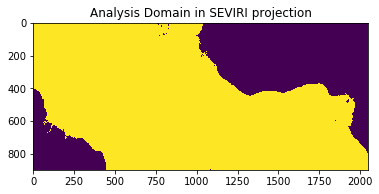

In [9]:
pl.imshow( lsm['lsm'])
pl.title('Analysis Domain in SEVIRI projection')
pl.savefig('../pics/lsm.jpg', dpi = 200)